In [1]:
!git clone https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git

%cd Data-Analytics-Learning-and-Projects

Cloning into 'Data-Analytics-Learning-and-Projects'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 34 (delta 6), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 688.68 KiB | 9.84 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/Data-Analytics-Learning-and-Projects


In [2]:
import numpy as np

In [3]:
data = np.genfromtxt('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/example_data.csv',
                     delimiter=';',
                     names=True,
                     dtype=None,
                     encoding='UTF')

In [4]:
data

array([('2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia', 'mww', 6.7, 'green', 1),
       ('2018-10-13 04:34:15.580', '25km E of Bitung, Indonesia', 'mww', 5.2, 'green', 0),
       ('2018-10-13 00:13:46.220', '42km WNW of Sola, Vanuatu', 'mww', 5.7, 'green', 0),
       ('2018-10-12 21:09:49.240', '13km E of Nueva Concepcion, Guatemala', 'mww', 5.7, 'green', 0),
       ('2018-10-12 02:52:03.620', '128km SE of Kimbe, Papua New Guinea', 'mww', 5.6, 'green', 1)],
      dtype=[('time', '<U23'), ('place', '<U37'), ('magType', '<U3'), ('mag', '<f8'), ('alert', '<U5'), ('tsunami', '<i8')])

In [5]:
data.dtype

dtype([('time', '<U23'), ('place', '<U37'), ('magType', '<U3'), ('mag', '<f8'), ('alert', '<U5'), ('tsunami', '<i8')])

In [6]:
data[1][1].dtype
data[1][0].dtype

dtype('<U23')

In [7]:
%%timeit
max([row[3] for row in data])

2.83 µs ± 97.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
data.dtype.names

('time', 'place', 'magType', 'mag', 'alert', 'tsunami')

In [9]:
type(data.dtype.names)

tuple

In [10]:
help(enumerate)

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable, start=0)
 |  
 |  Return an enumerate object.
 |  
 |    iterable
 |      an object supporting iteration
 |  
 |  The enumerate object yields pairs containing a count (from start, which
 |  defaults to zero) and a value yielded by the iterable argument.
 |  
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  __class_getitem__(...)
 |      See PEP 585
 |  
 |  ----------------------------------------------------------------------
 |  

In [11]:
array_dict = {}

for i, col in enumerate(data.dtype.names):
  array_dict[col] = np.array([row[i] for row in data])

array_dict

{'time': array(['2018-10-13 11:10:23.560', '2018-10-13 04:34:15.580',
        '2018-10-13 00:13:46.220', '2018-10-12 21:09:49.240',
        '2018-10-12 02:52:03.620'], dtype='<U23'),
 'place': array(['262km NW of Ozernovskiy, Russia', '25km E of Bitung, Indonesia',
        '42km WNW of Sola, Vanuatu',
        '13km E of Nueva Concepcion, Guatemala',
        '128km SE of Kimbe, Papua New Guinea'], dtype='<U37'),
 'magType': array(['mww', 'mww', 'mww', 'mww', 'mww'], dtype='<U3'),
 'mag': array([6.7, 5.2, 5.7, 5.7, 5.6]),
 'alert': array(['green', 'green', 'green', 'green', 'green'], dtype='<U5'),
 'tsunami': array([1, 0, 0, 0, 1])}

In [12]:
%%timeit
array_dict['mag'].max()

1.39 µs ± 20.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
np.array([value[array_dict['mag'].argmax()] for value in array_dict.values()])

array(['2018-10-13 11:10:23.560', '262km NW of Ozernovskiy, Russia',
       'mww', '6.7', 'green', '1'], dtype='<U32')

In [14]:
import pandas as pd

In [15]:
place = pd.Series(array_dict['place'], name='place')
place

,place
0,"262km NW of Ozernovskiy, Russia"
1,"25km E of Bitung, Indonesia"
2,"42km WNW of Sola, Vanuatu"
3,"13km E of Nueva Concepcion, Guatemala"
4,"128km SE of Kimbe, Papua New Guinea"


In [16]:
mag = pd.Series(array_dict['mag'], name="mag")
mag

##mag.index
##mag.values

,mag
0,6.7
1,5.2
2,5.7
3,5.7
4,5.6


In [17]:
place.index.is_unique
place.index.values

array([0, 1, 2, 3, 4])

_Note: Difference between the addition of numpy array and pandas data-structures_

**Addition in Numpy**

Numpy will use *Vectorization* and *Broadcasting* to perform the operations on array as the result below signifies.

**Addition in Pandas:**

In Pandas, airthmatic operations are only performed on the elements for which the index values match in both the operands being used as displayed by the following output

In [18]:
np.array([1,2]) + np.array([9])

array([10, 11])

In [19]:
pd.Series([1,2]) + pd.Series([9])

,0
0,10.0
1,NaN


In [20]:
 pd.Series(np.linspace(0, 10, num=5)) + pd.Series(np.linspace(0, 10, num=5), index=pd.Index([1, 2, 3, 4, 5]))


,0
0,NaN
1,2.5
2,7.5
3,12.5
4,17.5
5,NaN


In [21]:
np.linspace(0,10,5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [22]:
import datetime as dt

In [23]:
# help(dir)

In [24]:
# pd.date_range??

In [25]:
rng = np.random.default_rng(seed=0)
pd.DataFrame(
    data = {
        'random': rng.random(5),
        'text':['hot', 'warm', 'cool', 'cold', None],
        'truth': [rng.choice([True, False]) for _ in range(5)]
    },
    index = pd.date_range(
        end = dt.date(2019, 4, 21),
        periods = 5,
        freq = '1D',
        name = "date"
    )
)

,random,text,truth
date,,,
2019-04-17,0.636962,hot,False
2019-04-18,0.269787,warm,False
2019-04-19,0.040974,cool,False
2019-04-20,0.016528,cold,False
2019-04-21,0.813270,None,False


In [26]:
# rng.choice?

In [27]:
pd.DataFrame([
    {'mag' : 5.2, 'place' : 'California'},
    {'mag' : 1.2, 'place' : 'Alaska'},
    {'mag' : 0.2, 'place' : 'California'},
    ])

,mag,place
0,5.2,California
1,1.2,Alaska
2,0.2,California


In [28]:
list_of_tuples = [(n, n**2, n**3) for n in range(5)]
pd.DataFrame(
    data = list_of_tuples,
    columns = ['n', 'n_squared', 'n_cubes']
)

,n,n_squared,n_cubes
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27
4,4,16,64


In [29]:
!wc -l /content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquakes.csv

9333 /content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquakes.csv


In [30]:
!ls /content/Data-Analytics-Learning-and-Projects

Chapter-2


### Shell Commands and Magic Commands

IPython allows to run shell commands directly from IPython terminal. Any command that starts with `!` will be considered a shell command. This is different from using IPython's *Magic Commands* which are written by preceedingt them with `%` symbol. Although, `cd` is a shell command but it is run as a *Magic function* and is written as `%cd` like `%timeit`. Magic commands in Google Colab are written with double percent sign i.e., `%%` so, instead of `%cd` we write `%%cd`. Some commands in IPYthon can be run without the `%%` sign as they are **auto magic** functions and can be toggled with `%automagic` command.

The result of shell commands can be used in the python namespace by storing them in variables. Althought, the result can be read as a list but is different from the typical Python `list` data type and have special IPython data type which can be seem using the `type()` function of Python.

Links for reference:

1. [IPython and Shell Commands](https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html)
2. [Shell Commands in IPython](https://www.python4data.science/en/latest/workspace/ipython/shell.html)
3. [IPYthon reference: Command Line Usage](https://ipython.readthedocs.io/en/stable/interactive/reference.html#system-shell-access)


### Examining files through IPython

Before loading any file in Pyton it's better to analyze it through the commands provided by IPythin kernel. The `ls` commands gives the list of files in any folder. When used with `-lh` flag the info about files is lited in human readable format. We get the info about the size of the file. `wc` commands allows us to get the word count of the file and if follows by `-l` flag, the commands gives us the number of lines in that file.

`!head` allows to peak into the top few lines of the file whereas, `!tail` command allows us to peak at the last few lines of the file. This allows us to know whether the file contains the field name or not. When followed by `-n` flag we can mention the number of lines we want in the output too.

Although, we can use the `!head` command to count the number of fields/ columns in the file, for example

```
head = !head -n 1 /content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquake.csv
print(len(head[0].split(',')))

```
but, we can use a different approach. The `awk` is command in IPython is used for *pattern scanning and processing* we can use like

```
!awk -F',' {print NF; exit} '/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquake.csv'

```

where `-F` allows us to mention the delimiter. Further we can mention the operations we want to do on the file. `{print NF, exit}` prints the value of `NF` variable, which stores the size of the *current record*, and exit the file.

In [31]:
# # Can also be done ls -lh
# /content/Data-Analytics-Learning-and-Projects/Chapter-2/data | grep
# earthquake.csv

content  = !ls -lh /content/Data-Analytics-Learning-and-Projects/Chapter-2/data
content[1]

'-rw-r--r-- 1 root root 3.4M Mar 11 12:50 earthquakes.csv'

In [32]:
!head -n 1 /content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquakes.csv

alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,mmi,net,nst,place,rms,sig,sources,status,time,title,tsunami,type,types,tz,updated,url


In [33]:
df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquakes.csv')

In [34]:
import sqlite3

In [35]:
with sqlite3.connect('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/tsunami.db') as connection:
  pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/tsunamis.csv').to_sql('tsunamis', connection, index=False, if_exists='replace')

In [36]:
with sqlite3.connect('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/tsunami.db') as connection:
  tsunamis = pd.read_sql('SELECT * FROM tsunamis', connection)

tsunamis.head()

,alert,type,title,place,magType,mag,time
0,None,earthquake,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...","165km NNW of Flying Fish Cove, Christmas Island",mww,5.0,1539459504090
1,green,earthquake,"M 6.7 - 262km NW of Ozernovskiy, Russia","262km NW of Ozernovskiy, Russia",mww,6.7,1539429023560
2,green,earthquake,"M 5.6 - 128km SE of Kimbe, Papua New Guinea","128km SE of Kimbe, Papua New Guinea",mww,5.6,1539312723620
3,green,earthquake,"M 6.5 - 148km S of Severo-Kuril'sk, Russia","148km S of Severo-Kuril'sk, Russia",mww,6.5,1539213362130
4,green,earthquake,"M 6.2 - 94km SW of Kokopo, Papua New Guinea","94km SW of Kokopo, Papua New Guinea",mww,6.2,1539208835130


In [37]:
import requests

In [38]:
yesterday = dt.date.today() - dt.timedelta(days=1)
api = 'https://earthquake.usgs.gov/fdsnws/event/1/query'
payload = {
    'format': 'geojson',
    'starttime': yesterday - dt.timedelta(days=26),
    'endtime': yesterday
}

response = requests.get(api, params=payload)

In [39]:
response.status_code

200

In [40]:
earthquake_json = response.json()
earthquake_json.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

In [41]:
earthquake_json['metadata']

{'generated': 1741697427000,
 'url': 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2025-02-12&endtime=2025-03-10',
 'title': 'USGS Earthquakes',
 'status': 200,
 'api': '1.14.1',
 'count': 8842}

In [42]:
earthquake_json['features'][0]

{'type': 'Feature',
 'properties': {'mag': 0.63,
  'place': '21 km E of Little Lake, CA',
  'time': 1741564432490,
  'updated': 1741619143477,
  'tz': None,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ci41075848',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci41075848&format=geojson',
  'felt': None,
  'cdi': None,
  'mmi': None,
  'alert': None,
  'status': 'reviewed',
  'tsunami': 0,
  'sig': 6,
  'net': 'ci',
  'code': '41075848',
  'ids': ',ci41075848,',
  'sources': ',ci,',
  'types': ',nearby-cities,origin,phase-data,scitech-link,',
  'nst': 18,
  'dmin': 0.02309,
  'rms': 0.15,
  'gap': 76,
  'magType': 'ml',
  'type': 'earthquake',
  'title': 'M 0.6 - 21 km E of Little Lake, CA'},
 'geometry': {'type': 'Point',
  'coordinates': [-117.6788333, 35.9476667, 5.56]},
 'id': 'ci41075848'}

In [43]:
data = [dic['properties'] for dic in earthquake_json['features']]

In [44]:
df = pd.DataFrame(data=data)

***Note:*** In the book the data from the *earthquake.csv* file is used but, we are sticking with the data fecthed from the API.

In [45]:
df.empty

False

In [46]:
df.shape

(8842, 26)

In [47]:
df.head()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
0,0.63,"21 km E of Little Lake, CA",1741564432490,1741619143477,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci41075848,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",18.0,0.023090,0.15,76.0,ml,earthquake,"M 0.6 - 21 km E of Little Lake, CA"
1,1.80,"5 km NW of Boron, CA",1741564170180,1741564452802,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci41075840,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",44.0,0.100300,0.18,57.0,ml,earthquake,"M 1.8 - 5 km NW of Boron, CA"
2,4.50,"94 km ENE of Maumere, Indonesia",1741564156172,1741578901040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",us6000pxvb,",",us,",",origin,phase-data,",37.0,0.826000,0.54,96.0,mb,earthquake,"M 4.5 - 94 km ENE of Maumere, Indonesia"
3,1.90,"5 km SSW of Anchor Point, Alaska",1741564139927,1741564333347,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ak02534uizhk,",",ak,",",origin,phase-data,",NaN,NaN,0.69,NaN,ml,earthquake,"M 1.9 - 5 km SSW of Anchor Point, Alaska"
4,0.90,"2 km of The Geysers, CA",1741563855160,1741566139005,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",nc75145906,",",nc,",",nearby-cities,origin,phase-data,scitech-link,",14.0,0.009636,0.03,64.0,md,earthquake,"M 0.9 - 2 km of The Geysers, CA"


In [48]:
df.tail(2)

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,ids,sources,types,nst,dmin,rms,gap,magType,type,title
8840,1.03,"4 km SE of Redlands, CA",1739318632150,1739371733323,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",ci40184578,",",ci,",",nearby-cities,origin,phase-data,scitech-link,",37.0,0.03765,0.20,67.0,ml,earthquake,"M 1.0 - 4 km SE of Redlands, CA"
8841,0.44,"17 km SSE of Carbonado, Washington",1739318551840,1739383834710,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,NaN,...,",uw62067012,",",uw,",",origin,phase-data,",25.0,0.03404,0.08,115.0,ml,earthquake,"M 0.4 - 17 km SSE of Carbonado, Washington"


In [49]:
df.columns

Index(['mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt', 'cdi',
       'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title'],
      dtype='object')

In [50]:
df.dtypes

,0
mag,float64
place,object
time,int64
updated,int64
tz,object
url,object
detail,object
felt,float64
cdi,float64
mmi,float64


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8842 entries, 0 to 8841
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mag      8842 non-null   float64
 1   place    8842 non-null   object 
 2   time     8842 non-null   int64  
 3   updated  8842 non-null   int64  
 4   tz       0 non-null      object 
 5   url      8842 non-null   object 
 6   detail   8842 non-null   object 
 7   felt     593 non-null    float64
 8   cdi      593 non-null    float64
 9   mmi      102 non-null    float64
 10  alert    39 non-null     object 
 11  status   8842 non-null   object 
 12  tsunami  8842 non-null   int64  
 13  sig      8842 non-null   int64  
 14  net      8842 non-null   object 
 15  code     8842 non-null   object 
 16  ids      8842 non-null   object 
 17  sources  8842 non-null   object 
 18  types    8842 non-null   object 
 19  nst      7450 non-null   float64
 20  dmin     7449 non-null   float64
 21  rms      8841 

In [52]:
df.describe()

,mag,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,rms,gap
count,8842.000000,8.842000e+03,8.842000e+03,593.000000,593.000000,102.000000,8842.000000,8842.000000,7450.000000,7449.000000,8841.000000,7450.000000
mean,1.383583,1.740390e+12,1.740681e+12,104.659359,2.656661,3.442578,0.000679,56.448089,21.951812,0.384969,0.246306,119.088506
std,1.308655,6.303518e+08,6.292264e+08,816.086388,1.340782,1.317335,0.026042,94.604789,21.823828,1.597943,0.278285,64.614849
min,-1.280000,1.739319e+12,1.739319e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.560000,1.739858e+12,1.740173e+12,1.000000,2.000000,2.753750,0.000000,5.000000,9.000000,0.010850,0.070000,70.000000
50%,1.200000,1.740329e+12,1.740728e+12,2.000000,2.700000,3.365000,0.000000,22.000000,15.000000,0.044140,0.140000,104.000000
75%,1.850000,1.740924e+12,1.741212e+12,6.000000,3.400000,4.161750,0.000000,53.000000,25.000000,0.102900,0.300000,153.000000
max,6.100000,1.741564e+12,1.741696e+12,11400.000000,8.200000,7.680000,1.000000,915.000000,266.000000,60.591000,4.250000,356.000000


***Note:*** `np.object` which is used in the book for the code below is removed from the numpy library.

In [53]:
df.describe(include=object)

,place,tz,url,detail,alert,status,net,code,ids,sources,types,magType,type,title
count,8842,0,8842,8842,39,8842,8842,8842,8842,8842,8842,8842,8842,8842
unique,4575,0,8842,8842,1,2,15,8812,8842,81,68,8,5,6730
top,"2 km WNW of Bridge Creek, Oklahoma",NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,green,reviewed,nc,2025dryu,",ci41075848,",",nc,",",origin,phase-data,",ml,earthquake,"M 0.8 - 7 km NW of The Geysers, CA"
freq,270,NaN,1,1,39,6640,1974,2,1,1904,5494,5676,8698,49


***Note:*** It is important to note that `describe()` only gives us summary statistics for non-null values. This means that, if we had 100 rows and half of our data was null, then the average would be calculated as the sum of the 50 non-null rows divided by 50. If this is not the result we want, we need to change the null values to 0 before we run `describe()`.

In [54]:
df.nunique

<bound method DataFrame.nunique of        mag                               place           time        updated  \
0     0.63          21 km E of Little Lake, CA  1741564432490  1741619143477   
1     1.80                5 km NW of Boron, CA  1741564170180  1741564452802   
2     4.50     94 km ENE of Maumere, Indonesia  1741564156172  1741578901040   
3     1.90    5 km SSW of Anchor Point, Alaska  1741564139927  1741564333347   
4     0.90            2 km  of The Geysers, CA  1741563855160  1741566139005   
...    ...                                 ...            ...            ...   
8837  2.40    58 km SSE of King Salmon, Alaska  1739319164967  1741385693423   
8838  2.20           72 km WSW of Atka, Alaska  1739318913471  1741385693222   
8839  1.50        8 km SE of Fox River, Alaska  1739318740382  1741385701212   
8840  1.03             4 km SE of Redlands, CA  1739318632150  1739371733323   
8841  0.44  17 km SSE of Carbonado, Washington  1739318551840  1739383834710   

        tz                                                url  \
0     None  https://earthquake.usgs.gov/earthquakes/eventp...   
1     None  https://earthquake.usgs.gov/earthquakes/eventp...   
2     None  https://earthquake.usgs.gov/earthquakes/eventp...   
3     None  https://earthquake.usgs.gov/earthquakes/eventp...   
4     None  https://earthquake.usgs.gov/earthquakes/eventp...   
...    ...                                                ...   
8837  None  https://earthquake.usgs.gov/earthquakes/eventp...   
8838  None  https://earthquake.usgs.gov/earthquakes/eventp...   
8839  None  https://earthquake.usgs.gov/earthquakes/eventp...   
8840  None  https://earthquake.usgs.gov/earthquakes/eventp...   
8841  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                                 detail  felt  cdi  mmi  ...  \
0     https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
1     https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
2     https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
3     https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
4     https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
...                                                 ...   ...  ...  ...  ...   
8837  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
8838  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
8839  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
8840  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   
8841  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  NaN  ...   

                            ids  sources  \
0                  ,ci41075848,     ,ci,   
1                  ,ci41075840,     ,ci,   
2                  ,us6000pxvb,     ,us,   
3                ,ak02534uizhk,     ,ak,   
4                  ,nc75145906,     ,nc,   
...                         ...      ...   
8837  ,us7000pd1a,ak0251z46la8,  ,us,ak,   
8838             ,ak0251z45pk6,     ,ak,   
8839             ,ak0251z452xi,     ,ak,   
8840               ,ci40184578,     ,ci,   
8841               ,uw62067012,     ,uw,   

                                               types   nst      dmin   rms  \
0     ,nearby-cities,origin,phase-data,scitech-link,  18.0  0.023090  0.15   
1     ,nearby-cities,origin,phase-data,scitech-link,  44.0  0.100300  0.18   
2                                ,origin,phase-data,  37.0  0.826000  0.54   
3                                ,origin,phase-data,   NaN       NaN  0.69   
4     ,nearby-cities,origin,phase-data,scitech-link,  14.0  0.009636  0.03   
...                                              ...   ...       ...   ...   
8837                             ,origin,phase-data,   NaN       NaN  0.93   
8838                             ,origin,phase-data,   NaN       NaN  0.41   
8839                           

In [55]:
df['sig'].value_counts(normalize=True)

,proportion
sig,
0,0.151436
1,0.039358
9,0.031893
39,0.030084
30,0.027822
...,...
914,0.000113
245,0.000113
445,0.000113


In [56]:
df.alert.unique()

array([None, 'green'], dtype=object)

In [57]:
df.alert.value_counts(dropna=False)

,count
alert,
None,8803
green,39


In [58]:
df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquakes.csv')

In [59]:
df[['mag', 'title']]

,mag,title
0,1.35,"M 1.4 - 9km NE of Aguanga, CA"
1,1.29,"M 1.3 - 9km NE of Aguanga, CA"
2,3.42,"M 3.4 - 8km NE of Aguanga, CA"
3,0.44,"M 0.4 - 9km NE of Aguanga, CA"
4,2.16,"M 2.2 - 10km NW of Avenal, CA"
...,...,...
9327,0.62,"M 0.6 - 9km ENE of Mammoth Lakes, CA"
9328,1.00,"M 1.0 - 3km W of Julian, CA"
9329,2.40,"M 2.4 - 35km NNE of Hatillo, Puerto Rico"
9330,1.10,"M 1.1 - 9km NE of Aguanga, CA"


In [60]:
df[
    ['title', 'time'] +
    [col for col in df.columns if col.startswith('mag')]
]

,title,time,mag,magType
0,"M 1.4 - 9km NE of Aguanga, CA",1539475168010,1.35,ml
1,"M 1.3 - 9km NE of Aguanga, CA",1539475129610,1.29,ml
2,"M 3.4 - 8km NE of Aguanga, CA",1539475062610,3.42,ml
3,"M 0.4 - 9km NE of Aguanga, CA",1539474978070,0.44,ml
4,"M 2.2 - 10km NW of Avenal, CA",1539474716050,2.16,md
...,...,...,...,...
9327,"M 0.6 - 9km ENE of Mammoth Lakes, CA",1537230228060,0.62,md
9328,"M 1.0 - 3km W of Julian, CA",1537230135130,1.00,ml
9329,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",1537229908180,2.40,md
9330,"M 1.1 - 9km NE of Aguanga, CA",1537229545350,1.10,ml


In [61]:
df[['title', 'time']][100:103]

,title,time
100,"M 1.2 - 25km NW of Ester, Alaska",1539435449480
101,"M 0.6 - 8km ESE of Mammoth Lakes, CA",1539435391320
102,"M 1.3 - 8km ENE of Aguanga, CA",1539435293090


***Note:*** We can slice on whatever is in our index; however, it would be hard to determine the text or date after the last one we want, so with pandas, slicing dates and text is different from integer slicing and is inclusive of both endpoints. When slicing with dates, we can easily select subsets, such as all data from 2018 with `df['2018']`, or everything in October 2018 with `df['2018—10']`, or a specific range in October with `df['20181010':'20181020']` . Date slicing will work as long as the strings we provide can be parsed into a `datetime`. We will see examples of this throughout this book.

In [62]:
df[11:113]['title'] = df[110:113]['title'].str.lower()

<ipython-input-62-2411370abb9c>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[11:113]['title'] = df[110:113]['title'].str.lower()
<ipython-input-62-2411370abb9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [63]:
# Checking the Index type of df to clarify whther simple range indexing will
# work on dataframes even if their index is of the type date

df.index

RangeIndex(start=0, stop=9332, step=1)

In [64]:
df.loc[110:113, 'title'] = df.loc[110:113, 'title'].str.lower()

In [65]:
df.loc[10:15, ['title', 'mag']]

,title,mag
10,"M 0.5 - 10km NE of Aguanga, CA",0.50
11,"M 2.8 - 53km SE of Punta Cana, Dominican Republic",2.77
12,"M 0.5 - 9km NE of Aguanga, CA",0.50
13,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",4.50
14,"M 2.1 - 14km NW of Parkfield, CA",2.13
15,"M 2.0 - 156km WNW of Haines Junction, Canada",2.00


***Note:*** It can be noticed that when `DataFrame.loc[]` methood is used for indexing the end index is inlcuded in the output whereas, this is not the case Python's index slicing or with the `DataFrame.iloc[]` method.

In [66]:
df.iloc[10:15, [19,8]]

,title,mag
10,"M 0.5 - 10km NE of Aguanga, CA",0.50
11,"M 2.8 - 53km SE of Punta Cana, Dominican Republic",2.77
12,"M 0.5 - 9km NE of Aguanga, CA",0.50
13,"M 4.5 - 120km SSW of Banda Aceh, Indonesia",4.50
14,"M 2.1 - 14km NW of Parkfield, CA",2.13


In [67]:
# Example of slicing of columns through their names
df.loc[10:15, 'mag':'magType']

,mag,magType
10,0.50,ml
11,2.77,md
12,0.50,ml
13,4.50,mb
14,2.13,md
15,2.00,ml


### Slicing and Indexing in Pandas

Slicing and indexing in Pandas happens on the basis of the index column of the dataframe. The two methods provided by the library are, `DataFrame.loc[]`, for indexing and slicing based on the labels and `DataFrame.iloc[]` for indexing and slicing based on the position of the subset of the dataframe. Both of these methods, selects subset or element of th dataframe by utilising the index column and not the actual positions in the dataframe. `DataFrame.take(indices, axis)` takes in positional integers instead of the index values, which might not coincide as index values can be provided in any order, for slicing and indexing. For understanding the documentation of the `DataFrame.take()` method can be read below.

In [68]:
pd.DataFrame.take

<function pandas.core.generic.NDFrame.take(self, indices, axis: 'Axis' = 0, **kwargs) -> 'Self'>

In [69]:
help(pd.DataFrame.at)

Help on property:

    Access a single value for a row/column label pair.
    
    Similar to ``loc``, in that both provide label-based lookups. Use
    ``at`` if you only need to get or set a single value in a DataFrame
    or Series.
    
    Raises
    ------
    KeyError
        If getting a value and 'label' does not exist in a DataFrame or Series.
    
    ValueError
        If row/column label pair is not a tuple or if any label
        from the pair is not a scalar for DataFrame.
        If label is list-like (*excluding* NamedTuple) for Series.
    
    See Also
    --------
    DataFrame.at : Access a single value for a row/column pair by label.
    DataFrame.iat : Access a single value for a row/column pair by integer
        position.
    DataFrame.loc : Access a group of rows and columns by label(s).
    DataFrame.iloc : Access a group of rows and columns by integer
        position(s).
    Series.at : Access a single value by label.
    Series.iat : Access a single value 

In [70]:
df.at[10,'mag']

0.5

In [71]:
df.iat[10, 8]

0.5

In [72]:
df[df.mag >= 7]

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
837,green,4.1,1000haa3,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.763,3.0,14.0,",us1000haa3,pt18283003,at00pgehsk,",7.0,mww,...,",us,pt,at,",reviewed,1539204500290,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",600.0,1539378744253,https://earthquake.usgs.gov/earthquakes/eventp...
5263,red,8.4,1000h3p4,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.589,18.0,27.0,",us1000h3p4,us1000h4p4,",7.5,mww,...,",us,us,",reviewed,1538128963480,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake,",dyfi,finite-fault,general-text,geoserve,groun...",480.0,1539123134531,https://earthquake.usgs.gov/earthquakes/eventp...


***Note:*** `DatFrame.loc[]` method can handle **Boolean** masks.

In [73]:
df.loc[
    df.mag >= 7.0,
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
837,green,7.0,mww,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [74]:
df.loc[
    (df.tsunami == 1) & (df.alert == 'red'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [75]:
df.alert.value_counts()

,count
alert,
green,58
red,1


In [76]:
df.loc[
    (df.tsunami == 1) | (df.alert == 'red'),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type']
]

,alert,mag,magType,title,tsunami,type
36,NaN,5.0,mww,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,earthquake
118,green,6.7,mww,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,earthquake
501,green,5.6,mww,"M 5.6 - 128km SE of Kimbe, Papua New Guinea",1,earthquake
799,green,6.5,mww,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,earthquake
816,green,6.2,mww,"M 6.2 - 94km SW of Kokopo, Papua New Guinea",1,earthquake
...,...,...,...,...,...,...
8561,NaN,5.4,mb,"M 5.4 - 228km S of Taron, Papua New Guinea",1,earthquake
8624,NaN,5.1,mb,"M 5.1 - 278km SE of Pondaguitan, Philippines",1,earthquake
9133,green,5.1,ml,"M 5.1 - 64km SSW of Kaktovik, Alaska",1,earthquake
9175,NaN,5.2,mb,"M 5.2 - 126km N of Dili, East Timor",1,earthquake


**Useful:** `pd.Sereis.str`  method allows to perform string operations on array like objects element wise. Under the hood it vectorizes Python's string operations and methods.

In [77]:
pd.Series.str

pandas.core.strings.accessor.StringMethods

### Logical Operators in Pandas Masking

In Pandas, boolean masking requires `&`, `|`, and `~` instead of Python's `and`, `or`, and `not`. This is because Pandas operates on Series and DataFrames, which require element-wise comparisons.

##### Why `and`, `or`, `not` Don't Work
- These operators work only with single boolean values (`True` or `False`).
- Applying them to Pandas Series results in an error due to ambiguous truth values.

##### Correct Approach
- Use `&` for element-wise AND.
- Use `|` for element-wise OR.
- Use `~` for element-wise NOT.

##### NumPy Has the Same Restriction
- `and`, `or`, `not` also fail on NumPy arrays.
- Use `&`, `|`, and `~` for element-wise operations in NumPy as well.

In [78]:
df.loc[
    (df.place.str.contains('Alaska')) & (df.alert.notnull()),
    ['alert', 'mag', 'magType', 'title', 'tsunami', 'type', 'place']
]

,alert,mag,magType,title,tsunami,type,place
1015,green,5.0,ml,"M 5.0 - 61km SSW of Chignik Lake, Alaska",1,earthquake,"61km SSW of Chignik Lake, Alaska"
1273,green,4.0,ml,"M 4.0 - 71km SW of Kaktovik, Alaska",1,earthquake,"71km SW of Kaktovik, Alaska"
1795,green,4.0,ml,"M 4.0 - 60km WNW of Valdez, Alaska",1,earthquake,"60km WNW of Valdez, Alaska"
2752,green,4.0,ml,"M 4.0 - 67km SSW of Kaktovik, Alaska",1,earthquake,"67km SSW of Kaktovik, Alaska"
3260,green,3.9,ml,"M 3.9 - 44km N of North Nenana, Alaska",0,earthquake,"44km N of North Nenana, Alaska"
4101,green,4.2,ml,"M 4.2 - 131km NNW of Arctic Village, Alaska",0,earthquake,"131km NNW of Arctic Village, Alaska"
6897,green,3.8,ml,"M 3.8 - 80km SSW of Kaktovik, Alaska",0,earthquake,"80km SSW of Kaktovik, Alaska"
8524,green,3.8,ml,"M 3.8 - 69km SSW of Kaktovik, Alaska",0,earthquake,"69km SSW of Kaktovik, Alaska"
9133,green,5.1,ml,"M 5.1 - 64km SSW of Kaktovik, Alaska",1,earthquake,"64km SSW of Kaktovik, Alaska"


**Useful:** Pandas allows us to use *regular expressions* for masing without importing *re* module.

Reference: [Regex Reference; Python flavor too](https://regex101.com/)

In [79]:
df.loc[
    (df.place.str.contains(r'CA|California$')) & (df.mag > 3.8),
    ['alert', 'mag', 'magType', 'title', 'tsunami','type']
]

,alert,mag,magType,title,tsunami,type
1465,green,3.83,mw,"M 3.8 - 109km WNW of Trinidad, CA",0,earthquake
2414,green,3.83,mw,"M 3.8 - 5km SW of Tres Pinos, CA",1,earthquake


In [80]:
df.loc[
    df.mag.between(6.5, 7.5),
    ['alert', 'mag', 'magType', 'title', 'tsunami','type']
]

,alert,mag,magType,title,tsunami,type
118,green,6.7,mww,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,earthquake
799,green,6.5,mww,"M 6.5 - 148km S of Severo-Kuril'sk, Russia",1,earthquake
837,green,7.0,mww,"M 7.0 - 117km E of Kimbe, Papua New Guinea",1,earthquake
4363,green,6.7,mww,"M 6.7 - 263km NNE of Ndoi Island, Fiji",1,earthquake
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [81]:
df.loc[
    df.alert.isin(['orange', 'red']),
    ['alert', 'mag', 'magType', 'title', 'tsunami','type']
]

,alert,mag,magType,title,tsunami,type
5263,red,7.5,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


In [82]:
df.mag.idxmin(), df.mag.idxmax()

(2409, 5263)

In [83]:
df.loc[
    [df.mag.idxmin(), df.mag.idxmax()],
    ['alert', 'mag', 'magType', 'title', 'tsunami','type']
]

,alert,mag,magType,title,tsunami,type
2409,NaN,-1.26,ml,"M -1.3 - 41km ENE of Adak, Alaska",0,earthquake
5263,red,7.50,mww,"M 7.5 - 78km N of Palu, Indonesia",1,earthquake


***Note:*** Filtering using masking is done by applying operations on the values of the row or columns rather than on the labels of the columns or index of the rows. If we have to do filtering based on the rows' index or columns' labels then we should use `DataFrame.filter()` method instead.

In [84]:
pd.DataFrame.filter

<function pandas.core.generic.NDFrame.filter(self, items=None, like: 'str | None' = None, regex: 'str | None' = None, axis: 'Axis | None' = None) -> 'Self'>

In [85]:
df.filter(items=['alert', 'mag'])

,alert,mag
0,NaN,1.35
1,NaN,1.29
2,NaN,3.42
3,NaN,0.44
4,NaN,2.16
...,...,...
9327,NaN,0.62
9328,NaN,1.00
9329,NaN,2.40
9330,NaN,1.10


In [86]:
df.columns

Index(['alert', 'cdi', 'code', 'detail', 'dmin', 'felt', 'gap', 'ids', 'mag',
       'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources',
       'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz', 'updated',
       'url'],
      dtype='object')

In [87]:
df.filter(regex = 'i$', axis=1)

,cdi,mmi,tsunami
0,NaN,NaN,0
1,NaN,NaN,0
2,4.4,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0
...,...,...,...
9327,NaN,NaN,0
9328,NaN,NaN,0
9329,NaN,NaN,0
9330,NaN,NaN,0


In [88]:
df = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquakes.csv',
                 usecols = ['time', 'title', 'place', 'magType',
                            'mag', 'alert', 'tsunami'])

In [89]:
df['ones'] = 1
df.head(2)

,alert,mag,magType,place,time,title,tsunami,ones
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,1
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,1


In [90]:
df['maf_negative'] = df.mag < 0
df.head(2)

,alert,mag,magType,place,time,title,tsunami,ones,maf_negative
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,1,False
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,1,False


In [91]:
df['place'].str.extract(r'(CA|California)$').dropna().value_counts()

,count
0,
CA,2737
California,124


In [92]:
df['place'].str.extract(r', (.*$)')[0].sort_values().unique()

array(['Afghanistan', 'Alaska', 'Argentina', 'Arizona', 'Arkansas',
       'Australia', 'Azerbaijan', 'B.C., MX', 'Barbuda', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba ', 'British Virgin Islands',
       'Burma', 'CA', 'California', 'Canada', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Colorado', 'Costa Rica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Ecuador region',
       'El Salvador', 'Fiji', 'Greece', 'Greenland', 'Guam', 'Guatemala',
       'Haiti', 'Hawaii', 'Honduras', 'Idaho', 'Illinois', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Kansas',
       'Kentucky', 'Kyrgyzstan', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Missouri', 'Montana', 'NV', 'Nevada', 'New Caledonia',
       'New Hampshire', 'New Mexico', 'New Zealand', 'Nicaragua',
       'North Carolina', 'Northern Mariana Islands', 'Oklahoma', 'Oregon',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Philippines',
       'Puerto Rico', 'Roman

In [93]:
pd.Series.str.replace

<function pandas.core.strings.accessor.StringMethods.replace(self, pat: 'str | re.Pattern', repl: 'str | Callable', n: 'int' = -1, case: 'bool | None' = None, flags: 'int' = 0, regex: 'bool' = False)>

In [94]:
df['parsed_place'] = df.place.str.replace(
    r'.* of ', '', regex = True # remove anything saying <something> of <something>
).str.replace(
    r'the ', '', regex = True # remove things starting with "the"
).str.replace(
    r'CA$', 'California', regex = True # fix California
).str.replace(
    r'NV$', 'Nevada', regex = True # fix Nevada
).str.replace(
    r'MX$', 'Mexico', regex = True # fix Mexico
).str.replace(
    r' region$', '', regex = True # chop off endings with "region"
).str.replace(
    r'northern ', '', regex = True # remove "northern"
).str.replace(
    r'Fiji Islands', 'Fiji', regex = True # line up the Fiji places
).str.replace(
    r'^.*, ', '', regex = True # remove anything else extraneous from the beginning
).str.strip() # remove any extra spaces

***Note:*** In Pandas 1.3+ version it is required to pass `regex = True` as the attribute, which is by default set to `False`, if we are passing *regex* as the value of `pat` attribute.

In [95]:
df.parsed_place.sort_values().unique()

array(['Afghanistan', 'Alaska', 'Argentina', 'Arizona', 'Arkansas',
       'Ascension Island', 'Australia', 'Azerbaijan', 'Balleny Islands',
       'Barbuda', 'Bolivia', 'British Virgin Islands', 'Burma',
       'California', 'Canada', 'Carlsberg Ridge',
       'Central East Pacific Rise', 'Central Mid-Atlantic Ridge', 'Chile',
       'China', 'Christmas Island', 'Colombia', 'Colorado', 'Costa Rica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'El Salvador',
       'Fiji', 'Greece', 'Greenland', 'Guam', 'Guatemala', 'Haiti',
       'Hawaii', 'Honduras', 'Idaho', 'Illinois', 'India',
       'Indian Ocean Triple Junction', 'Indonesia', 'Iran', 'Iraq',
       'Italy', 'Jamaica', 'Japan', 'Kansas', 'Kentucky',
       'Kermadec Islands', 'Kuril Islands', 'Kyrgyzstan', 'Martinique',
       'Mauritius', 'Mayotte', 'Mexico', 'Mid-Indian Ridge', 'Missouri',
       'Montana', 'Nevada', 'New Caledonia', 'New Hampshire',
       'New Mexico', 'New Zealand', 'Nicaragua', 'North Carolina',


In [96]:
pd.Series.str.replace??

In [97]:
df.assign(
    in_ca = df.parsed_place.str.contains('California'),
    in_alaska = df.parsed_place.str.contains('Alaska')
).head()

,alert,mag,magType,place,time,title,tsunami,ones,maf_negative,parsed_place,in_ca,in_alaska
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,1,False,California,True,False
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,1,False,California,True,False
2,NaN,3.42,ml,"8km NE of Aguanga, CA",1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,1,False,California,True,False
3,NaN,0.44,ml,"9km NE of Aguanga, CA",1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,1,False,California,True,False
4,NaN,2.16,md,"10km NW of Avenal, CA",1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,1,False,California,True,False


In [98]:
df.columns

Index(['alert', 'mag', 'magType', 'place', 'time', 'title', 'tsunami', 'ones',
       'maf_negative', 'parsed_place'],
      dtype='object')

***Note:*** `DataFrame.assign()` method doesn't modifies the existing dataframe but, creates a copy of the exsiting dataframe, modifies it by adding or changing columns to it and return this new dataframe.

In [99]:
pd.DataFrame.assign

<function pandas.core.frame.DataFrame.assign(self, **kwargs) -> 'DataFrame'>

### **Lambda Functions in Pandas and NumPy**  

Lambda functions are widely used in **Pandas** and **NumPy** for concise, inline operations. They are commonly applied in methods that automatically pass a **DataFrame** or **array** as an argument.  

#### **Pandas Usage**  
- **`assign()`** → Adds new columns using lambda functions.  
  ```python
  df.assign(abs_mag=lambda x: x.mag.abs())
  ```
- **`apply()`** → Applies a function element-wise.  
  ```python
  df['new_col'] = df['mag'].apply(lambda x: x**2)
  ```
- **Masking in `loc[]`** → Filters rows using lambda functions.  
  ```python
  df.loc[lambda df: df['mag'] > 0, 'status'] = 'Positive'
  ```

#### **NumPy Usage**  
- **`np.where()`** → Performs inline masking.  
  ```python
  np.where(arr < 0, arr * -1, arr)  # Convert negatives to positives
  ```
- **`np.vectorize()`** → Applies a function element-wise.  
  ```python
  vectorized_func = np.vectorize(lambda x: x**2 if x > 0 else 0)
  result = vectorized_func(arr)
  ```

In [106]:
tsunami = df.loc[df.tsunami == 1]
no_tsunami = df.loc[df.tsunami == 0]

In [107]:
tsunami.shape, no_tsunami.shape

((61, 10), (9271, 10))

In [111]:
pd.concat([tsunami, no_tsunami], axis=0).shape

(9332, 10)

***Note:*** `append()` and `concat()` methods are not available as methods for `Series`, `Index` or `DataFrame` objects rather now, are available to `pandas` object itself.

In [122]:
additional_cols = pd.read_csv('/content/Data-Analytics-Learning-and-Projects/Chapter-2/data/earthquakes.csv', usecols = ['tz', 'felt', 'ids'])

In [123]:
pd.concat([df, additional_cols], axis = 1)

,alert,mag,magType,place,time,title,tsunami,ones,maf_negative,parsed_place,felt,ids,tz
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,1,False,California,NaN,",ci37389218,",-480.0
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,1,False,California,NaN,",ci37389202,",-480.0
2,NaN,3.42,ml,"8km NE of Aguanga, CA",1539475062610,"M 3.4 - 8km NE of Aguanga, CA",0,1,False,California,28.0,",ci37389194,",-480.0
3,NaN,0.44,ml,"9km NE of Aguanga, CA",1539474978070,"M 0.4 - 9km NE of Aguanga, CA",0,1,False,California,NaN,",ci37389186,",-480.0
4,NaN,2.16,md,"10km NW of Avenal, CA",1539474716050,"M 2.2 - 10km NW of Avenal, CA",0,1,False,California,NaN,",nc73096941,",-480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,NaN,0.62,md,"9km ENE of Mammoth Lakes, CA",1537230228060,"M 0.6 - 9km ENE of Mammoth Lakes, CA",0,1,False,California,NaN,",nc73086771,",-480.0
9328,NaN,1.00,ml,"3km W of Julian, CA",1537230135130,"M 1.0 - 3km W of Julian, CA",0,1,False,California,NaN,",ci38063967,",-480.0
9329,NaN,2.40,md,"35km NNE of Hatillo, Puerto Rico",1537229908180,"M 2.4 - 35km NNE of Hatillo, Puerto Rico",0,1,False,Puerto Rico,NaN,",pr2018261000,",-240.0
9330,NaN,1.10,ml,"9km NE of Aguanga, CA",1537229545350,"M 1.1 - 9km NE of Aguanga, CA",0,1,False,California,NaN,",ci38063959,",-480.0


In [124]:
df.columns

Index(['alert', 'mag', 'magType', 'place', 'time', 'title', 'tsunami', 'ones',
       'maf_negative', 'parsed_place'],
      dtype='object')

***Note:*** The `concat()` function uses the index to determine how to concatenate the values. If they don't align, this will generate additional rows because pandas won't know how to align them. Say we forgot that our original dataframe had the row numbers as the index, and we read in the additional columns by setting the time column as the index:

```
additional_columns = pd.read_csv(
  'data/earthquakes.csv', usecols=['tz', 'felt', 'ids', 'time'],
  index_col='time'
  )

pd.concat([df.head(2), additional_columns.head(2)], axis=1)

```
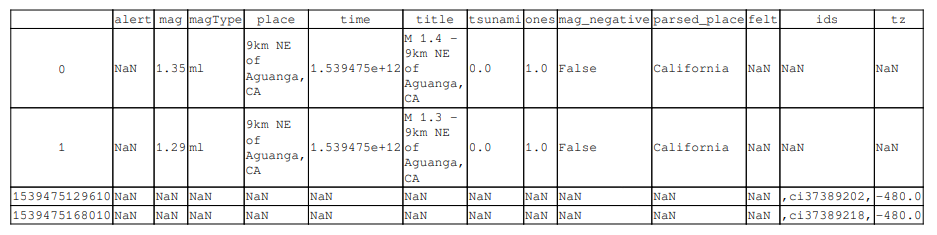

In [125]:
pd.concat(
    [
        tsunami.head(2),
        no_tsunami.head(2).assign(type = 'earthquake')
    ]
)

,alert,mag,magType,place,time,title,tsunami,ones,maf_negative,parsed_place,type
36,NaN,5.00,mww,"165km NNW of Flying Fish Cove, Christmas Island",1539459504090,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,1,False,Christmas Island,NaN
118,green,6.70,mww,"262km NW of Ozernovskiy, Russia",1539429023560,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,1,False,Russia,NaN
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,1,False,California,earthquake
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,1,False,California,earthquake


In [127]:
pd.concat(
    [
        tsunami.head(2),
        no_tsunami.head(2).assign(type = 'earthquake')
    ],
    join = 'inner'
)

,alert,mag,magType,place,time,title,tsunami,ones,maf_negative,parsed_place
36,NaN,5.00,mww,"165km NNW of Flying Fish Cove, Christmas Island",1539459504090,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,1,False,Christmas Island
118,green,6.70,mww,"262km NW of Ozernovskiy, Russia",1539429023560,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,1,False,Russia
0,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,1,False,California
1,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,1,False,California


In [128]:
pd.concat(
    [
        tsunami.head(2),
        no_tsunami.head(2).assign(type = 'earthquake')
    ],
    join = 'inner', ignore_index = True
)

,alert,mag,magType,place,time,title,tsunami,ones,maf_negative,parsed_place
0,NaN,5.00,mww,"165km NNW of Flying Fish Cove, Christmas Island",1539459504090,"M 5.0 - 165km NNW of Flying Fish Cove, Christm...",1,1,False,Christmas Island
1,green,6.70,mww,"262km NW of Ozernovskiy, Russia",1539429023560,"M 6.7 - 262km NW of Ozernovskiy, Russia",1,1,False,Russia
2,NaN,1.35,ml,"9km NE of Aguanga, CA",1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,1,False,California
3,NaN,1.29,ml,"9km NE of Aguanga, CA",1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,1,False,California


### Deleting columns from the DataFrame

Columns from a dataframe can be deleted using either `del df['<column_name>']` or `df.pop('<column_name>')`. `DataFrame.pop()` method will retur the removed column while `del` approach won't. *Both of these methods modifies the original dataframe*

In [129]:
pd.DataFrame.pop

<function pandas.core.frame.DataFrame.pop(self, item: 'Hashable') -> 'Series'>

***Note:*** In place of `mag_negative` I had mistyped it to `maf_negative` so, below I am modifying the column attribute for correcting the name.

In [132]:
df.columns = ['alert', 'mag', 'magType', 'place', 'time', 'title', 'tsunami', 'ones',
              'mag_negative', 'parsed_place']

In [133]:
df.columns

Index(['alert', 'mag', 'magType', 'place', 'time', 'title', 'tsunami', 'ones',
       'mag_negative', 'parsed_place'],
      dtype='object')

In [134]:
mag_negative = df.pop('mag_negative')

#### Drop method

Pandas provide `.drop()` method for `DatFrame`, `Series` and `Index` objects which allows us to drop rows and columns. By default, it drop rows and columns can be dropped either by passing a list of column names to be dropped or setting `axis = 1`. `.drop()` gives a new dataframe instead of modifying the original one, to setoff this beahviour we can set `inplace = True`.

In [136]:
pd.Index.drop

<function pandas.core.indexes.base.Index.drop(self, labels: 'Index | np.ndarray | Iterable[Hashable]', errors: 'IgnoreRaise' = 'raise') -> 'Index'>